In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *

In [57]:
# Reads in data files for use in readData.py

hdu_sweep1 = fits.open('/Users/mtownsend/anaconda/Data/sweep-050m030-060m025-GOODS-S.fits') # this is one sweep file of the DECaLS data
hdu_sweep2 = fits.open('/Users/mtownsend/anaconda/Data/sweep-150p000-160p005-COSMOS.fits') # this is one sweep file of the DECaLS data
hdu_sweep3 = fits.open('/Users/mtownsend/anaconda/Data/sweep-210p050-220p055-AEGIS.fits') # this is one sweep file of the DECaLS data
hdu_sweep4 = fits.open('/Users/mtownsend/anaconda/Data/sweep-180p060-190p065-GOODS-N.fits') # this is one sweep file of the DECaLS data


GOODS_S_data = hdu_sweep1[1].data
COSMOS_data = hdu_sweep2[1].data
AEGIS_data = hdu_sweep3[1].data
GOODS_N_data = hdu_sweep4[1].data

ra_GOODS_S, dec_GOODS_S, gflux_GOODS_S, rflux_GOODS_S, zflux_GOODS_S, w1flux_GOODS_S, w2flux_GOODS_S, w3flux_GOODS_S, w4flux_GOODS_S, gflux_ivar_GOODS_S, rflux_ivar_GOODS_S, zflux_ivar_GOODS_S, w1flux_ivar_GOODS_S, w2flux_ivar_GOODS_S, w3flux_ivar_GOODS_S, w4flux_ivar_GOODS_S, mw_transmission_g_GOODS_S, mw_transmission_r_GOODS_S, mw_transmission_z_GOODS_S, mw_transmission_w1_GOODS_S, mw_transmission_w2_GOODS_S, mw_transmission_w3_GOODS_S, mw_transmission_w4_GOODS_S = readBricks(GOODS_S_data)
ra_COSMOS, dec_COSMOS, gflux_COSMOS, rflux_COSMOS, zflux_COSMOS, w1flux_COSMOS, w2flux_COSMOS, w3flux_COSMOS, w4flux_COSMOS, gflux_ivar_COSMOS, rflux_ivar_COSMOS, zflux_ivar_COSMOS, w1flux_ivar_COSMOS, w2flux_ivar_COSMOS, w3flux_ivar_COSMOS, w4flux_ivar_COSMOS, mw_transmission_g_COSMOS, mw_transmission_r_COSMOS, mw_transmission_z_COSMOS, mw_transmission_w1_COSMOS, mw_transmission_w2_COSMOS, mw_transmission_w3_COSMOS, mw_transmission_w4_COSMOS = readBricks(COSMOS_data)
ra_GOODS_N, dec_GOODS_N, gflux_GOODS_N, rflux_GOODS_N, zflux_GOODS_N, w1flux_GOODS_N, w2flux_GOODS_N, w3flux_GOODS_N, w4flux_GOODS_N, gflux_ivar_GOODS_N, rflux_ivar_GOODS_N, zflux_ivar_GOODS_N, w1flux_ivar_GOODS_N, w2flux_ivar_GOODS_N, w3flux_ivar_GOODS_N, w4flux_ivar_GOODS_N, mw_transmission_g_GOODS_N, mw_transmission_r_GOODS_N, mw_transmission_z_GOODS_N, mw_transmission_w1_GOODS_N, mw_transmission_w2_GOODS_N, mw_transmission_w3_GOODS_N, mw_transmission_w4_GOODS_N = readBricks(GOODS_N_data)
ra_AEGIS, dec_AEGIS, gflux_AEGIS, rflux_AEGIS, zflux_AEGIS, w1flux_AEGIS, w2flux_AEGIS, w3flux_AEGIS, w4flux_AEGIS, gflux_ivar_AEGIS, rflux_ivar_AEGIS, zflux_ivar_AEGIS, w1flux_ivar_AEGIS, w2flux_ivar_AEGIS, w3flux_ivar_AEGIS, w4flux_ivar_AEGIS, mw_transmission_g_AEGIS, mw_transmission_r_AEGIS, mw_transmission_z_AEGIS, mw_transmission_w1_AEGIS, mw_transmission_w2_AEGIS, mw_transmission_w3_AEGIS, mw_transmission_w4_AEGIS = readBricks(AEGIS_data)


print("end readdata")

# IMPORTANT NOTE: LRG data is the same for each.


done reading in DECaLS bricks
done reading in DECaLS bricks
done reading in DECaLS bricks
done reading in DECaLS bricks
end readdata


In [65]:
data = open('/Users/mtownsend/Downloads/3dhst_master.phot.v4.1/3dhst_master.phot.v4.1.cat', 'r')
lines = data.readlines()[2:]

ra_3dhst = []
dec_3dhst = []
field = []
zpeak = []
star_flag = []

for line in lines:
    p = line.split()
    field.append(p[1])
    ra_3dhst.append(float(p[2]))
    dec_3dhst.append(float(p[3]))
    zpeak.append(float(p[7]))
    star_flag.append(p[30])
    
print(len(ra_3dhst))
print(len(dec_3dhst))
print(len(field))

print(type(field))

starflag_3DHST = np.array(star_flag)
field_3DHST = np.array(field)
zpeak_3DHST = np.array(zpeak)
ra_3DHST = np.array(ra_3dhst)
dec_3DHST = np.array(dec_3dhst)

ra_COSMOS_3DHST = np.array(ra_3DHST[np.where((starflag_3DHST == '0') & (field_3DHST == 'COSMOS') & (zpeak_3DHST >= 0.2) & (zpeak_3DHST <= 0.65))])
dec_COSMOS_3DHST = np.array(dec_3DHST[np.where((starflag_3DHST == '0') & (field_3DHST == 'COSMOS') & (zpeak_3DHST >= 0.2) & (zpeak_3DHST <= 0.65))])
ra_GOODS_S_3DHST = np.array(ra_3DHST[np.where((starflag_3DHST == '0') & (field_3DHST == 'GOODS-S') & (zpeak_3DHST >= 0.2) & (zpeak_3DHST <= 0.65))])
dec_GOODS_S_3DHST = np.array(dec_3DHST[np.where((starflag_3DHST == '0') & (field_3DHST == 'GOODS-S') & (zpeak_3DHST >= 0.2) & (zpeak_3DHST <= 0.65))])

ra_AEGIS_3DHST = np.array(ra_3DHST[np.where((starflag_3DHST == '0') & (field_3DHST == 'AEGIS') & (zpeak_3DHST >= 0.2) & (zpeak_3DHST <= 0.65))])
dec_AEGIS_3DHST = np.array(dec_3DHST[np.where((starflag_3DHST == '0') & (field_3DHST == 'AEGIS') & (zpeak_3DHST >= 0.2) & (zpeak_3DHST <= 0.65))])
ra_GOODS_N_3DHST = np.array(ra_3DHST[np.where((starflag_3DHST == '0') & (field_3DHST == 'GOODS-N') & (zpeak_3DHST >= 0.2) & (zpeak_3DHST <= 0.65))])
dec_GOODS_N_3DHST = np.array(dec_3DHST[np.where((starflag_3DHST == '0') & (field_3DHST == 'GOODS-N') & (zpeak_3DHST >= 0.2) & (zpeak_3DHST <= 0.65))])



print(len(ra_COSMOS_3DHST))
print(len(ra_GOODS_3DHST))

print(starflag_3DHST)


207967
207967
207967
<class 'list'>
2872
2142
['1' '0' '0' ... '2' '0' '2']


In [66]:
# calculate BKG magnitudes

gmag_GOODS_S = 22.5 - 2.5 * np.log10(gflux_GOODS_S)
gmag_COSMOS = 22.5 - 2.5 * np.log10(gflux_COSMOS)
rmag_GOODS_S = 22.5 - 2.5 * np.log10(rflux_GOODS_S)
rmag_COSMOS = 22.5 - 2.5 * np.log10(rflux_COSMOS)
zmag_GOODS_S = 22.5 - 2.5 * np.log10(zflux_GOODS_S)
zmag_COSMOS = 22.5 - 2.5 * np.log10(zflux_COSMOS)

gmag_GOODS_N = 22.5 - 2.5 * np.log10(gflux_GOODS_N)
gmag_AEGIS = 22.5 - 2.5 * np.log10(gflux_AEGIS)
rmag_GOODS_N = 22.5 - 2.5 * np.log10(rflux_GOODS_N)
rmag_AEGIS = 22.5 - 2.5 * np.log10(rflux_AEGIS)
zmag_GOODS_N = 22.5 - 2.5 * np.log10(zflux_GOODS_N)
zmag_AEGIS = 22.5 - 2.5 * np.log10(zflux_AEGIS)


In [67]:
from astropy.coordinates import SkyCoord, match_coordinates_sky                                   
from astropy import units as u       

# threedeehst_cat = SkyCoord(ra=ra_3DHST*u.degree, dec=dec_3DHST*u.degree) 
COSMOS_cat  = SkyCoord(ra=ra_COSMOS_3DHST*u.degree, dec=dec_COSMOS_3DHST*u.degree)
GOODS_S_cat = SkyCoord(ra=ra_GOODS_3DHST*u.degree, dec=dec_GOODS_3DHST*u.degree)

AEGIS_cat  = SkyCoord(ra=ra_AEGIS_3DHST*u.degree, dec=dec_AEGIS_3DHST*u.degree)
GOODS_N_cat = SkyCoord(ra=ra_GOODS_N_3DHST*u.degree, dec=dec_GOODS_N_3DHST*u.degree)

my_cat_GOODS_S = SkyCoord(ra=ra_GOODS_S*u.degree, dec=dec_GOODS_S*u.degree) 
my_cat_COSMOS = SkyCoord(ra=ra_COSMOS*u.degree, dec=dec_COSMOS*u.degree) 

my_cat_GOODS_N = SkyCoord(ra=ra_GOODS_N*u.degree, dec=dec_GOODS_N*u.degree) 
my_cat_AEGIS = SkyCoord(ra=ra_AEGIS*u.degree, dec=dec_AEGIS*u.degree) 

# idx, sep2d, dist3d = match_coordinates_sky(threedeehst_cat, my_cat, nthneighbor=1)

idx_GOODS_S, sep2d_GOODS_S, dist3d_GOODS_S = match_coordinates_sky(GOODS_S_cat, my_cat_GOODS_S, nthneighbor=1)
idx_COSMOS, sep2d_COSMOS, dist3d_COSMOS = match_coordinates_sky(COSMOS_cat, my_cat_COSMOS, nthneighbor=1)

idx_GOODS_N, sep2d_GOODS_N, dist3d_GOODS_N = match_coordinates_sky(GOODS_N_cat, my_cat_GOODS_N, nthneighbor=1)
idx_AEGIS, sep2d_AEGIS, dist3d_AEGIS = match_coordinates_sky(AEGIS_cat, my_cat_AEGIS, nthneighbor=1)



In [69]:
print(len(idx_COSMOS))
print(len(sep2d_COSMOS))

sep2d_COSMOS_deg = sep2d_COSMOS.deg
sep2d_GOODS_S_deg = sep2d_GOODS_S.deg
sep2d_AEGIS_deg = sep2d_AEGIS.deg
sep2d_GOODS_N_deg = sep2d_GOODS_N.deg

sep_idx_COSMOS = idx_COSMOS[np.where(sep2d_COSMOS_deg <= 0.0003)]
sep_idx_GOODS_S = idx_GOODS_S[np.where(sep2d_GOODS_S_deg <= 0.0003)]
sep_idx_AEGIS = idx_AEGIS[np.where(sep2d_AEGIS_deg <= 0.0003)]
sep_idx_GOODS_N = idx_GOODS_N[np.where(sep2d_GOODS_N_deg <= 0.0003)]

print(len(sep_idx_COSMOS))
print(len(sep_idx_GOODS_S))
print(len(sep_idx_AEGIS))
print(len(sep_idx_GOODS_N))


2872
2872
1075
774
739
714


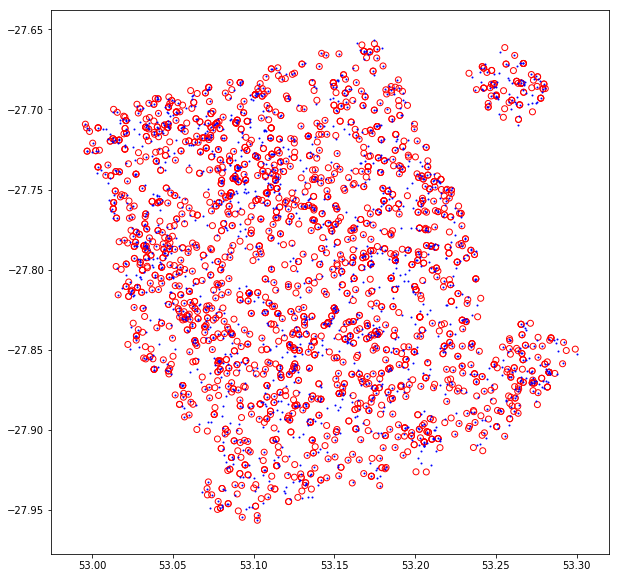

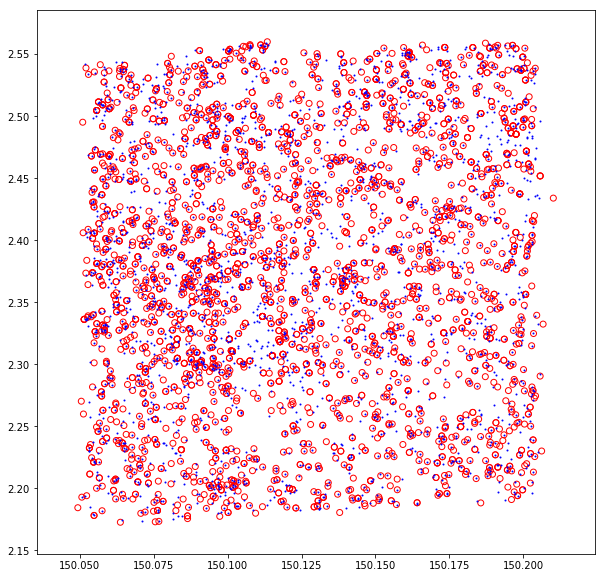

In [48]:
plt.rcParams["figure.figsize"] = [10, 10]
# plt.scatter(ra_combo_nocuts[np.where(sep2d_GOODS.deg<= 0.01)], dec_combo_nocuts[np.where(sep2d_GOODS.deg<= 0.01)], facecolors='none', edgecolors='r')
plt.scatter(ra_GOODS_S[idx_GOODS], dec_GOODS_S[idx_GOODS], facecolors='none', edgecolors='r')
plt.scatter(ra_GOODS_3DHST, dec_GOODS_3DHST, c="blue", s=1)
plt.show()

plt.rcParams["figure.figsize"] = [10, 10]
# plt.scatter(ra_combo_nocuts[np.where(sep2d_GOODS.deg<= 0.01)], dec_combo_nocuts[np.where(sep2d_GOODS.deg<= 0.01)], facecolors='none', edgecolors='r')
plt.scatter(ra_COSMOS[idx_COSMOS], dec_COSMOS[idx_COSMOS], facecolors='none', edgecolors='r')
plt.scatter(ra_COSMOS_3DHST, dec_COSMOS_3DHST, c="blue", s=1)
plt.show()

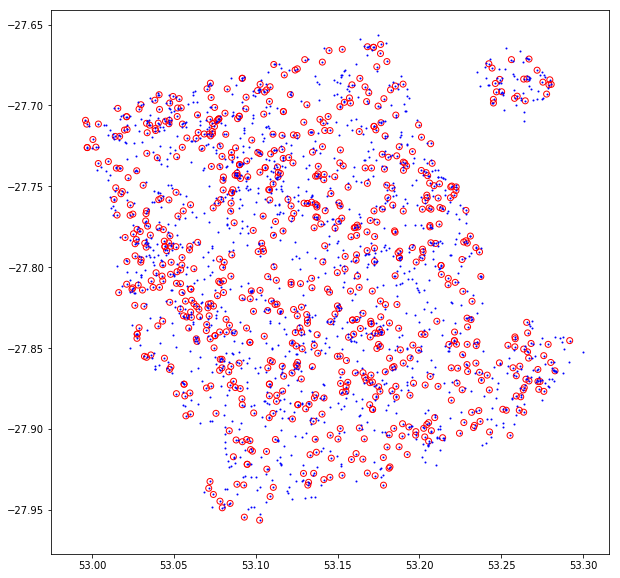

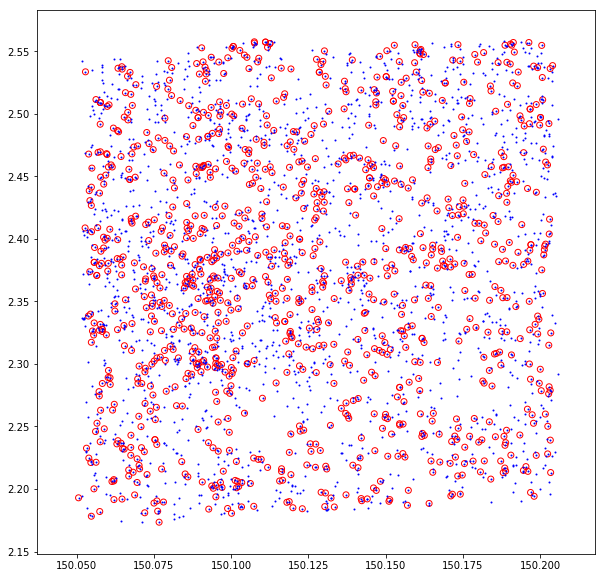

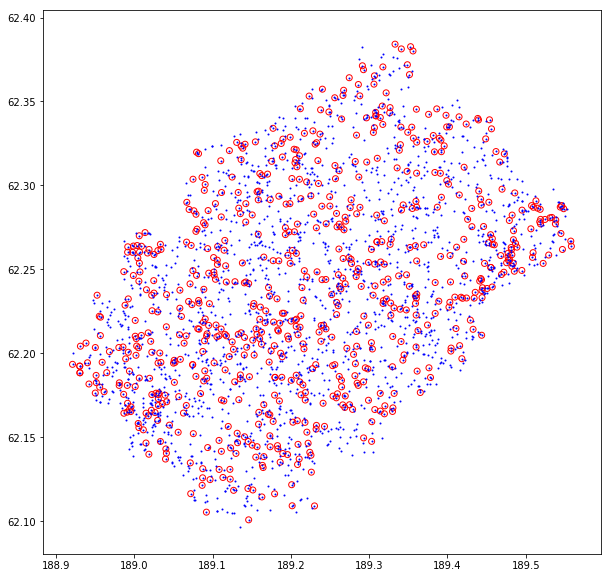

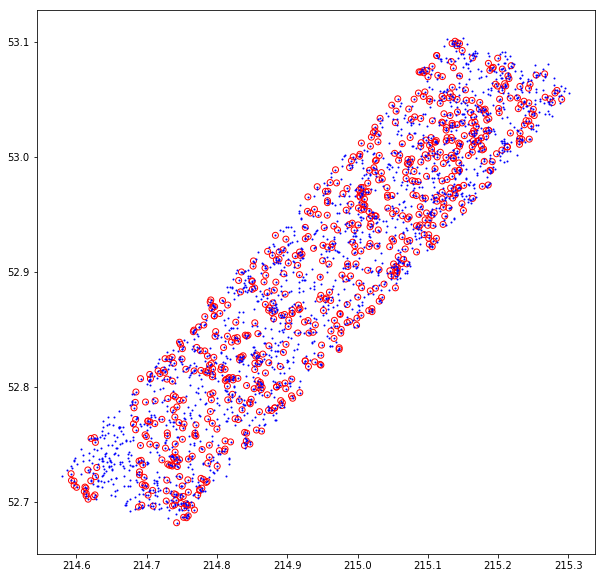

774
1075


In [73]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.scatter(ra_GOODS_S[sep_idx_GOODS_S], dec_GOODS_S[sep_idx_GOODS_S], facecolors='none', edgecolors='r')
plt.scatter(ra_GOODS_3DHST, dec_GOODS_3DHST, c="blue", s=1)
plt.show()

plt.rcParams["figure.figsize"] = [10, 10]
plt.scatter(ra_COSMOS[sep_idx_COSMOS], dec_COSMOS[sep_idx_COSMOS], facecolors='none', edgecolors='r')
plt.scatter(ra_COSMOS_3DHST, dec_COSMOS_3DHST, c="blue", s=1)
plt.show()

plt.rcParams["figure.figsize"] = [10, 10]
plt.scatter(ra_GOODS_N[sep_idx_GOODS_N], dec_GOODS_N[sep_idx_GOODS_N], facecolors='none', edgecolors='r')
plt.scatter(ra_GOODS_N_3DHST, dec_GOODS_N_3DHST, c="blue", s=1)
plt.show()

plt.rcParams["figure.figsize"] = [10, 10]
plt.scatter(ra_AEGIS[sep_idx_AEGIS], dec_AEGIS[sep_idx_AEGIS], facecolors='none', edgecolors='r')
plt.scatter(ra_AEGIS_3DHST, dec_AEGIS_3DHST, c="blue", s=1)
plt.show()


print(len(sep2d_GOODS_S[np.where(sep2d_GOODS_S.deg <= 0.0003)]))
print(len(sep2d_COSMOS[np.where(sep2d_COSMOS.deg <= 0.0003)]))


3302
3302
3302
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


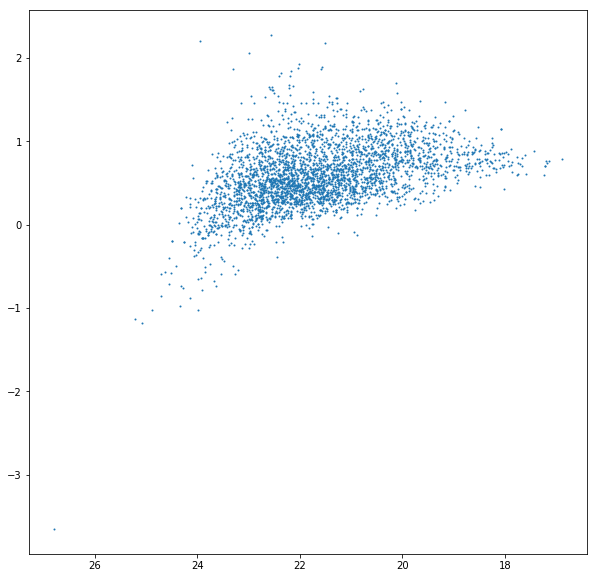

In [78]:
# gmag_combo = np.concatenate([gmag_GOODS_S, gmag_COSMOS])
# rmag_combo = np.concatenate([rmag_GOODS_S, rmag_COSMOS])
# zmag_combo = np.concatenate([zmag_GOODS_S, zmag_COSMOS])

# calculate BKG (g-r) and (r-z) colors
    
grcolor_GOODS_S = gmag_GOODS_S[sep_idx_GOODS_S] - rmag_GOODS_S[sep_idx_GOODS_S]
rzcolor_GOODS_S = rmag_GOODS_S[sep_idx_GOODS_S] - zmag_GOODS_S[sep_idx_GOODS_S]
# print(len(grcolor_GOODS_S))

grcolor_COSMOS = gmag_COSMOS[sep_idx_COSMOS] - rmag_COSMOS[sep_idx_COSMOS]
rzcolor_COSMOS = rmag_COSMOS[sep_idx_COSMOS] - zmag_COSMOS[sep_idx_COSMOS]
# print(len(grcolor_COSMOS))

grcolor_GOODS_N = gmag_GOODS_N[sep_idx_GOODS_N] - rmag_GOODS_N[sep_idx_GOODS_N]
rzcolor_GOODS_N = rmag_GOODS_N[sep_idx_GOODS_N] - zmag_GOODS_N[sep_idx_GOODS_N]
# print(len(grcolor_GOODS_N))

grcolor_AEGIS = gmag_AEGIS[sep_idx_AEGIS] - rmag_AEGIS[sep_idx_AEGIS]
rzcolor_AEGIS = rmag_AEGIS[sep_idx_AEGIS] - zmag_AEGIS[sep_idx_AEGIS]
# print(len(grcolor_COSMOS))

grcolor = np.concatenate([grcolor_GOODS_S, grcolor_COSMOS, grcolor_GOODS_N, grcolor_AEGIS])
rzcolor = np.concatenate([rzcolor_GOODS_S, rzcolor_COSMOS, rzcolor_GOODS_N, rzcolor_AEGIS])
zmag = np.concatenate([zmag_GOODS_S[sep_idx_GOODS_S], zmag_COSMOS[sep_idx_COSMOS], zmag_GOODS_N[sep_idx_GOODS_N], zmag_AEGIS[sep_idx_AEGIS]])
print(len(zmag))
print(len(grcolor))
print(len(rzcolor))

rz_edges = [-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.69729232788086, 8.94729232788086, 9.19729232788086, 9.44729232788086, 9.69729232788086, 9.94729232788086, 10.19729232788086, 10.44729232788086]
zmag_edges = [13.22509, 13.425090026855468, 13.625090026855467, 13.825090026855467, 14.025090026855466, 14.225090026855465, 14.425090026855464, 14.625090026855464, 14.825090026855463, 15.025090026855462, 15.225090026855462, 15.425090026855461, 15.62509002685546, 15.82509002685546, 16.02509002685546, 16.225090026855458, 16.425090026855457, 16.625090026855457, 16.825090026855456, 17.025090026855455, 17.225090026855455, 17.425090026855454, 17.625090026855453, 17.825090026855452, 18.02509002685545, 18.22509002685545, 18.42509002685545, 18.62509002685545, 18.82509002685545, 19.025090026855448, 19.225090026855447, 19.425090026855447, 19.625090026855446, 19.825090026855445, 20.025090026855445, 20.225090026855444, 20.425090026855443, 20.625090026855442, 20.82509002685544, 21.02509002685544, 21.22509002685544, 21.42509002685544, 21.62509002685544, 21.825090026855438, 22.025090026855437, 22.225090026855437, 22.425090026855436, 22.625090026855435, 22.825090026855435, 23.025090026855434]
gr_edges = [-6.5846786, -6.234678649902344, -5.8846786499023445, -5.534678649902345, -5.184678649902345, -4.8346786499023455, -4.484678649902346, -4.134678649902346, -3.784678649902346, -3.434678649902346, -3.084678649902346, -2.734678649902346, -2.384678649902346, -2.0346786499023457, -1.6846786499023456, -1.3346786499023455, -0.9846786499023455, -0.6346786499023456, -0.2846786499023456, 0.06532135009765438, 0.41532135009765436, 0.7653213500976543, 1.1153213500976542, 1.4653213500976543, 1.8153213500976544, 2.1653213500976545, 2.5153213500976546, 2.8653213500976547, 3.2153213500976547, 3.565321350097655, 3.915321350097655, 4.265321350097655, 4.615321350097655, 4.965321350097654, 5.315321350097654, 5.665321350097654, 6.015321350097653, 6.365321350097653, 6.7153213500976525, 7.065321350097652, 7.415321350097652, 7.7653213500976515, 8.115321350097652, 8.465321350097652, 8.815321350097651, 9.165321350097651, 9.51532135009765, 9.86532135009765, 10.21532135009765, 10.56532135009765]

H1, nouse_edges = np.histogramdd((rzcolor, zmag, grcolor), bins=(rz_edges, zmag_edges, gr_edges), density=False)

# make 2D projections of 3D histogram
rz_v_zmag = H1[:, :, :].sum(axis=2)
rz_vs_zmag = np.fliplr(rz_v_zmag)
gr_v_zmag = H1[:, :, :].sum(axis=0)
gr_vs_zmag = np.flipud(gr_v_zmag.T)
gr_v_rz = H1[:, :, :].sum(axis=1)
gr_vs_rz = np.flipud(gr_v_rz.T)


print(rz_vs_zmag)
print()
print()
print(gr_vs_zmag)
print()
print()
print(gr_vs_rz)

# plt.matshow(rz_vs_zmag)
# plt.show()

plt.scatter(zmag, rzcolor, s=1)
plt.gca().invert_xaxis()
plt.show()

